# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

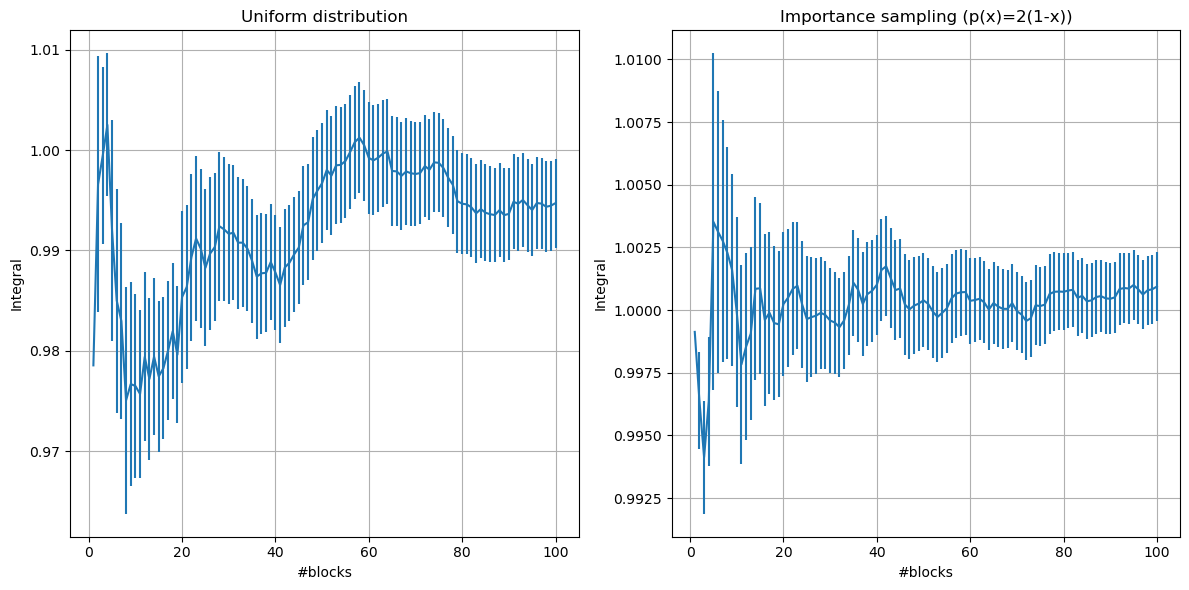

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dai file
data_unif = np.loadtxt('Integral_unif_out.txt')
data_importance = np.loadtxt('Integral_importance_out.txt')

# Estrai le colonne
x_unif, y_unif, err_unif = data_unif[:, 0], data_unif[:, 1], data_unif[:, 2]
x_importance, y_importance, err_importance = data_importance[:, 0], data_importance[:, 1], data_importance[:, 2]

# Crea due grafici affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per la distribuzione uniforme
axs[0].errorbar(x_unif, y_unif, yerr=err_unif)
axs[0].set_title('Uniform distribution')
axs[0].set_xlabel('#blocks')
axs[0].set_ylabel('Integral')
axs[0].grid(True)

# Grafico per l'importance sampling
axs[1].errorbar(x_importance, y_importance, yerr=err_importance)
axs[1].set_title('Importance sampling (p(x)=2(1-x))')
axs[1].set_xlabel('#blocks')
axs[1].set_ylabel('Integral')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In entrambi i casi, si verifica una buona convergenza al valore atteso.
Nel caso del importance sampling, tale convergenza risulta essere migliore.
Nel caso dell'importance sampling, la distribuzione di probabilità da campionare è stata scelta pari a p(x) = 2*(1 - x): l'idea è stata quella di prendere la retta passante per i punti (1,0) e (0, pi/2) poichè questi sono i punti in cui passa f(x) agli estremi del dominio di interesse; tale retta risulta essre pi/2 * (1 - x): normalizzandola, si ottiene p(x) come scritta sopra.
Il metodo, quindi, consente di campionare variabili casuali secondo la distribuzione di probabilità p(x) (e questo è stato fatto invertendo la cumulativa di p(x) nell'intervallo [0,1]) per poi calcolare la media dei valori di g(x) (definita, a partire da f(x) e p(x), come f(x)/p(x)) valutata nei punti campionati secondo p(x); tale media corrisponde ad una stima dell'integrale.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [2]:
#ESEGUO I FIT
from scipy.odr import *

def sqrt_fit(p, x, yerr):
    
    def sqrt(p, x):
        k = p
        return k * np.sqrt(x)
    
    model = Model(sqrt)
    data_for_odr = RealData(x, p, sy=yerr)
    odr = ODR(data_for_odr, model, beta0=[1])
    regr = odr.run()
    x_fit = np.linspace(x[0], x[-1], 1000)
    y_fit = regr.beta[0] * np.sqrt(x_fit)
    return x_fit, y_fit
        

/Users/aureliocaslini/anaconda3/lib/python3.11/site-packages/scipy/odr/_odrpack.py:394: RuntimeWarning: divide by zero encountered in divide
  return 1./numpy.power(sd, 2)


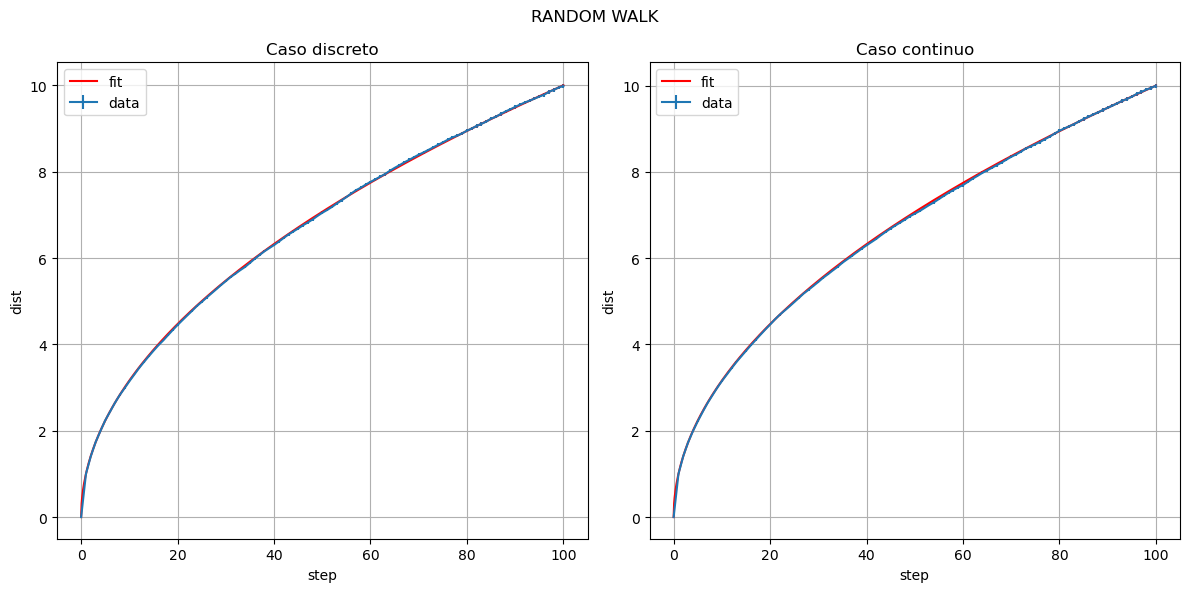

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati dai file
data_unif = np.loadtxt('Discreto_out.txt')
data_importance = np.loadtxt('Continuo_out.txt')

# Estrai le colonne
x_unif, y_unif, err_unif = data_unif[:, 0], data_unif[:, 1], data_unif[:, 2]
x_importance, y_importance, err_importance = data_importance[:, 0], data_importance[:, 1], data_importance[:, 2]

# Crea due grafici affiancati
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per la distribuzione uniforme
axs[0].errorbar(x_unif, y_unif, yerr=err_unif, label = 'data')
x_fit, y_fit = sqrt_fit(y_unif, x_unif, err_unif)
axs[0].plot(x_fit, y_fit, label='fit', color = 'red')
axs[0].set_title('Caso discreto')
axs[0].set_xlabel('step')
axs[0].set_ylabel('dist')
axs[0].grid(True)
axs[0].legend()

# Grafico per l'importance sampling
axs[1].errorbar(x_importance, y_importance, yerr=err_importance, label = 'data')
x_fit_c, y_fit_c = sqrt_fit(y_importance, x_importance, err_importance)
axs[1].plot(x_fit_c, y_fit_c, label='fit', color = 'red')
axs[1].set_title('Caso continuo')
axs[1].set_xlabel('step')
axs[1].set_ylabel('dist')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('RANDOM WALK')
plt.tight_layout()
plt.show()

In entrambi i casi si verifica che la forma è quella attesa (i dati si sovrappongono ai fit in maniera perfetta).

Nel caso continuo, ogni passo è stato eseguito campionando uniformemente un punto su una sfera di raggio 1 centrata nel punto precedente. L'estrazione, al fine di ottenere un campionamento uniforme, è stata eseguita nel modo seguente:
- l'angolo polare theta è stato estratto uniformemente da 0 a 2*pi;
- l'angolo azimutale phi è stato estratto campionando un numero (x) uniformemente in [0,1], per poi calcolare phi = arccos(2*x - 1). 